<a href="https://colab.research.google.com/github/prajwal0210/Crypto-currency-Analysis/blob/main/CryptoCurrency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finance Crypto-currency Analysis**

# **Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# **Importing datasets**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BTC.csv to BTC.csv
Saving LTC.csv to LTC.csv
Saving ETH.csv to ETH.csv


In [12]:
df_BTC = pd.read_csv('/content/BTC.csv')
df_ETH = pd.read_csv('/content/ETH.csv')
df_LTC = pd.read_csv('/content/LTC.csv')




## `printing data for BTC`




In [13]:
df_BTC.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-01-02,7174.744012,7179.957689,7237.014866,7152.992402
1,BTC,2020-01-03,6955.487580,7174.712357,7190.188749,6914.857474
2,BTC,2020-01-04,7291.219505,6955.487580,7390.041835,6852.093401
3,BTC,2020-01-05,7337.636670,7291.217504,7390.762935,7263.178696
4,BTC,2020-01-06,7347.433264,7337.421391,7487.333871,7316.763370





## `printing data for ETH`




In [14]:
df_ETH.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2020-01-02,129.887363,128.721621,132.679174,128.270384
1,ETH,2020-01-03,127.055601,129.886343,130.632441,126.130247
2,ETH,2020-01-04,132.970833,127.055601,134.684152,125.481419
3,ETH,2020-01-05,133.820621,132.970302,135.584815,132.326351
4,ETH,2020-01-06,134.834252,133.816791,138.195358,133.543008





## `printing data for LTC`




In [15]:
df_LTC.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2020-01-02,41.385445,41.213525,41.988071,41.052952
1,LTC,2020-01-03,39.416136,41.384400,41.593541,39.126482
2,LTC,2020-01-04,41.710735,39.418568,42.296355,38.730721
3,LTC,2020-01-05,42.591971,41.710256,42.802725,41.701629
4,LTC,2020-01-06,43.259522,42.586827,44.545911,42.352389


# Creating dataframe for holding the closing price all three crypto currencies

In [16]:
df = pd.DataFrame({'BTC': df_BTC['Closing Price (USD)'],
                   'ETH': df_ETH['Closing Price (USD)'],
                   'LTC': df_LTC['Closing Price (USD)']})

all the values are the `closing price` for all three crypto-currencies

In [17]:
df.head()

,BTC,ETH,LTC
0,7174.744012,129.887363,41.385445
1,6955.487580,127.055601,39.416136
2,7291.219505,132.970833,41.710735
3,7337.636670,133.820621,42.591971
4,7347.433264,134.834252,43.259522


# **getting statictics on the data**

In [18]:
df.describe()

,BTC,ETH,LTC
count,367.000000,367.000000,367.000000
mean,11174.016127,308.805469,56.442984
std,4392.522034,145.543477,18.406679
min,4944.702336,107.898345,32.053195
25%,8896.109855,201.337438,44.145145
50%,9708.949140,244.542851,48.985544
75%,11669.766680,391.112618,61.143475
max,29333.605121,746.062517,129.601959


 `- here we can see that value of bitcoin is quite expencive than all others`

# Visualising the closing price of crypto currency

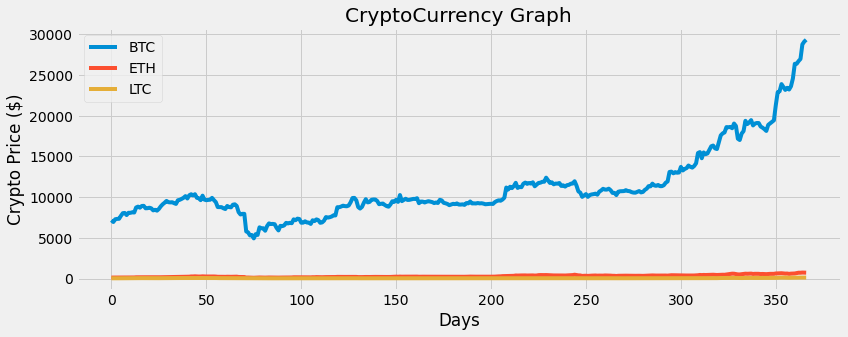

In [19]:
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize= (12.2, 4.5))

#looping through columns 
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label= c)

plt.title('CryptoCurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()

`as you can see we are not getting any good visual's of ETH and LTC in comparison to BTC`

In [24]:
# Scaling the data
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler(feature_range = (0,100))
scaled = min_max_scalar.fit_transform(df)
scaled

array([[  9.14367364,   3.44566798,   9.56675385],
       [  8.24467284,   3.00193225,   7.54795978],
       [  9.62124943,   3.92884613,   9.90021798],
       ...,
       [ 97.68432013, 100.        ,  98.6259223 ],
       [ 99.08940736,  99.22526002,  94.29107256],
       [100.        ,  97.48852262,  96.23665699]])

`Scaling means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1`

In [25]:
# converting the scaled data into dataframe
df_scale = pd.DataFrame(scaled, columns=df.columns)

## Visualizing scaled data

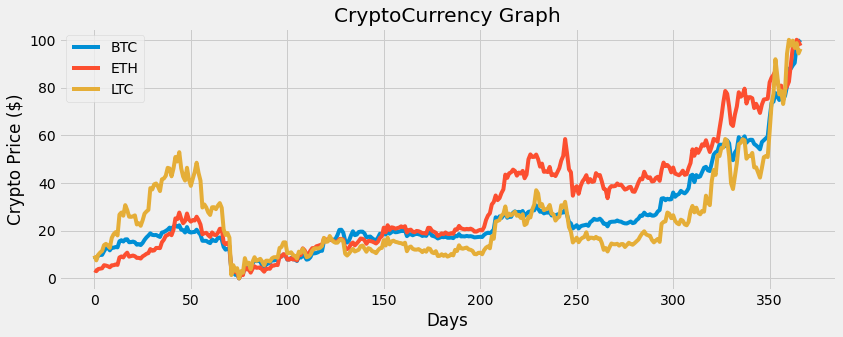

In [26]:
my_crypto = df_scale

plt.figure(figsize=(12.4, 4.5))

#looping through columns 
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label= c)

plt.title('CryptoCurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()

**`pct_change()`** function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row. Note : This function is mostly useful in the time-series data

In [27]:
# Getting daily simple return 
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.030559,-0.021802,-0.047585
2,0.048269,0.046556,0.058215
3,0.006366,0.006391,0.021127
4,0.001335,0.007575,0.015673
...,...,...,...
362,0.012457,0.065795,0.016272
363,0.009645,-0.002105,-0.022836
364,0.066471,0.029654,0.015481
365,0.011912,-0.006627,-0.032969


## Visualizing Daily Simple Return

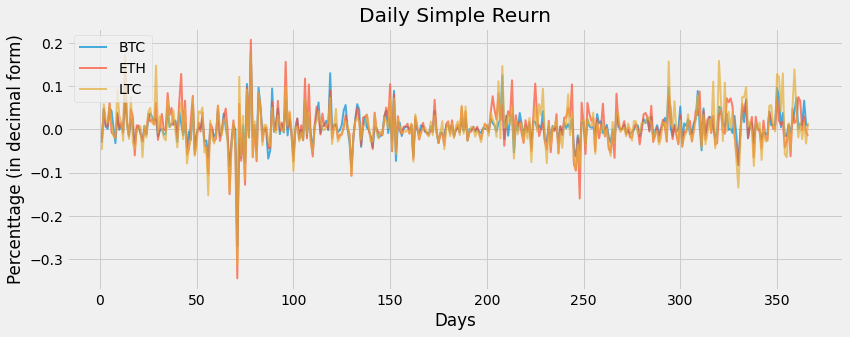

In [28]:
plt.figure(figsize=(12.4, 4.5))

#looping through columns 
for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c] , label= c, lw= 2, alpha= .7)

plt.title('Daily Simple Reurn')
plt.xlabel('Days')
plt.ylabel('Percenttage (in decimal form)')
plt.legend(DSR.columns.values, loc='upper left')
plt.show()



```
- as you can see LTC very low negative between day 50-100
- and ETH experienced a postive spike between day 50-100
```



## Volatility of crypto-currency



```
volatility is standar-diveation and square root of variance
```



In [32]:
print('Crypto-Currency volatility')
DSR.std()

Crypto-Currency volatility


BTC    0.035062
ETH    0.046952
LTC    0.049434
dtype: float64



```
- as you can see LTC is the riskiest of all three
- And BTC is the least volatile
```



In [34]:
# calculating mean or average Daily Simple Return
print('A
verage of Daily Simple Return')
DSR.mean()

average of Daily Simple Return


BTC    0.004481
ETH    0.005870
LTC    0.004284
dtype: float64



```
- LTC has the least return but highest volatility
- ETH would be great tro invest as it has highest return
```



# Co-relation between Crypto-curreency



`co-relation` is used to determine when a change in one variable can result change in a another variable



In [35]:
# getting co-relation
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.821533,0.82105
ETH,0.821533,1.000000,0.82579
LTC,0.821050,0.825790,1.00000




```
- BTC has positive co-relation with ETH & LTC
- ETH & LTC has the highest positve co-relation which is 0.825%
```



## Visualizing the co-relation

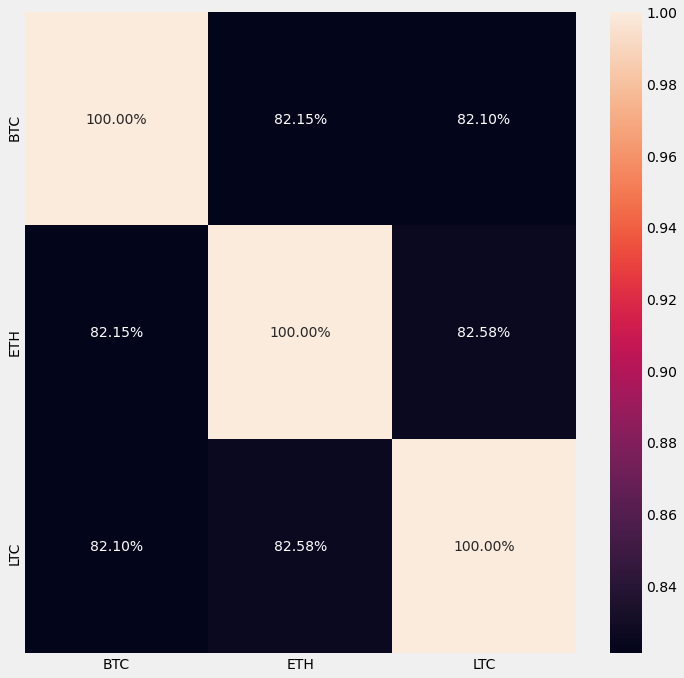

In [38]:
import seaborn as sns
plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(), annot= True, fmt='.2%')

Now what if I had invested a $1 in all three how much profit or loss would I had made ?

In [39]:
# get daily cummalative simple return
DCSR = (DSR+1).cumprod()

DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.969441,0.978198,0.952415
2,1.016234,1.023740,1.007860
3,1.022704,1.030282,1.029153
4,1.024069,1.038086,1.045283
...,...,...,...
362,3.723900,5.590264,3.123270
363,3.759818,5.578495,3.051947
364,4.009737,5.743919,3.099195
365,4.057500,5.705855,2.997019


## Visualing daily cummalative simple return

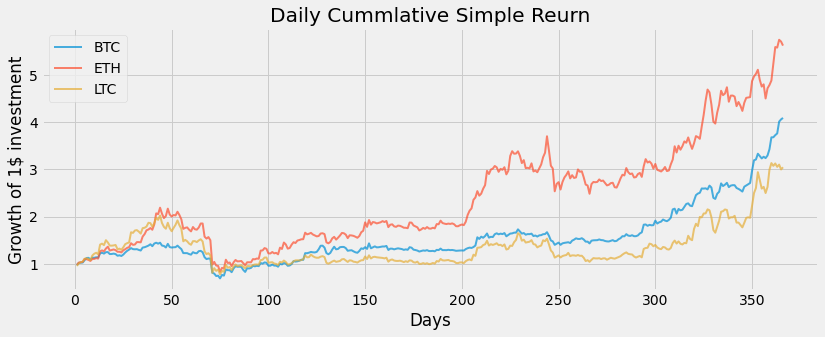

In [41]:
plt.figure(figsize=(12.4, 4.5))

#looping through columns 
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c] , label= c, lw= 2, alpha= .7)

plt.title('Daily Cummlative Simple Reurn')
plt.xlabel('Days')
plt.ylabel('Growth of 1$ investment')
plt.legend(DCSR.columns.values, loc='upper left')
plt.show()



```
- so if i had invested a $ in BTC a year later i could have have made a profit of above 4$
- in case of ETC i could have made the highest profit which would have been above 5$
- and with LTC i could have made the least profit which would be around 3$
```

